# Interpolação Numérica

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:* Luiz Eduardo Tojal Ramos Santos




---



**Referência:** Algoritmos para interpolação lagrangeana baricêntrica, conforme descrito em Berrut & Trfethen, *Barycentric Lagrange Interpolation*, SIAM Review 46(3) (2004), pp. 501--517

https://people.maths.ox.ac.uk/trefethen/barycentric.pdf

## Preliminares

In [ ]:
import numpy as np         #Numpy
import matplotlib.pyplot as plt # Gráficos
from scipy.special import binom # Coeficientes binomiais


#### ❗Exercício 0❗

Preencha o seu número USP abaixo

In [ ]:
# Coloque aqui o seu número USP
nusp = 11764386

nusp_str=str(nusp).replace("0","")

magic_ilong = int(nusp_str)
magic_ishort = int(str(magic_ilong)[:2])
magic_int = int(str(magic_ilong)[-1:])
#magic_int = int(list(set(nusp_str))[0])


print("magic_ilong  =", magic_ilong)
print("magic_ishort =", magic_ishort)
print("magic_int =", magic_int)

magic_ilong  = 11764386
magic_ishort = 11
magic_int = 6


## Teoria de Interpolação

Considere a tabela
$$
    \begin{array}{c|cccc}
        x & x_0 & x_1 & \dots & x_n \\
        \hline
        y & y_0 & y_1 & \dots & y_n
    \end{array} ,
$$

com $x_i \ne x_j$ se $i \ne j$.
Então, o polinômio interpolador $p_n$ da tabela na forma de Lagrange é dado por

$$
    p_n(x) = \sum_{j=0}^n y_j L_j(x)
$$

onde os polinômios de Lagrange $L_j$ são definidos por

$$
    L_j(x) = \prod^n_{\substack{k = 0 \\ k \ne j}} \frac{x - x_k}{x_j - x_k}, \quad 0 \le j \le n.
$$



### Exemplo
Considere a tabela

$$
    \begin{array}{c|rccc}
        x & -1 & 0 & 1 & 2 \\
        \hline
        2^x & 0.5 & 1 & 2 & 4
    \end{array}
$$

da função $2^x$ nos pontos $-1, 0, 1$ e $2$.

Vamos encontrar o polinômio de grau 3 que interpola esses pontos, passo a passo!


In [ ]:
# Nossa tabela

a = -1  #inicio
b = 2   #fim
n = 3   #grau (são n+1 pontos)

#Valores de x
xd = np.linspace(a, b, n+1)
print("x:", xd)

# A função que queremos interpolar
def f(x):
  return np.power(2.0, x)

#Valores de 2^x nos pontos de interpolação
yd = f(xd)
print("y:", yd)


x: [-1.  0.  1.  2.]
y: [0.5 1.  2.  4. ]


Agora vamos ver quem são os nossos polinômios de Lagrange, os $L_i(x)$.

In [ ]:
#Polinômio de Lagrange
def L(x, i, xd):
  xi = xd[i]
  x_sem_i = np.delete(xd, [i])
  numer = x - x_sem_i
  denom = xi - x_sem_i
  return np.prod(numer/denom)


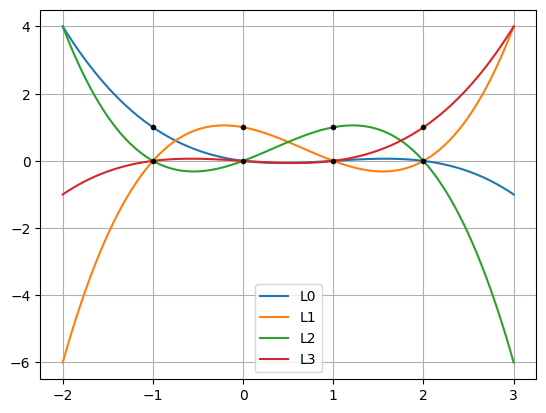

In [ ]:
#Vamos avaliar esses polinômios L_i em muitos pontos e fazer um gráfico deles
N = 100
x = np.linspace(a-1, b+1, N)

L0=np.empty(N)
L1=np.empty(N)
L2=np.empty(N)
L3=np.empty(N)

for j, xj in enumerate(x):
  L0[j] = L(xj, 0, xd)
  L1[j] = L(xj, 1, xd)
  L2[j] = L(xj, 2, xd)
  L3[j] = L(xj, 3, xd)

plt.plot(x, L0, label="L0")
plt.plot(x, L1, label="L1")
plt.plot(x, L2, label="L2")
plt.plot(x, L3, label="L3")
plt.plot(xd, np.ones(len(xd)), 'k.', xd, np.zeros(len(xd)), 'k.')
plt.grid()
plt.legend()
plt.show()

Observe como cada um dos $L_i$ é um polinômio de grau $n$ ($n=3$ neste caso), que vale 1 no ponto $x_i$ e zero nos outros pontos $x_j$, com $j\neq i$.

In [ ]:
# O polinômio interpolador de Lagrange é combinação linear dos Li
def pol(x, xd, yd):
  pol = 0.0
  for i in range(len(xd)):
    pol = pol + L(x, i, xd)* yd[i]
  return pol

Vamos calcular $\sqrt{2} = 2^{0.5}$ com esse polinômio:

In [ ]:
raiz2_aprox = pol(0.5, xd, yd)
raiz2_np = np.sqrt(2.0)
print("Raiz de 2 aproximada : " , raiz2_aprox)
print("Raiz de 2 do numpy : " , raiz2_np)
print("Erro:", raiz2_aprox - raiz2_np )

Raiz de 2 aproximada :  1.40625
Raiz de 2 do numpy :  1.4142135623730951
Erro: -0.007963562373095145


Agora vamos avaliar o polinômio em um conjunto grande de pontos, para ver como o polinômio aproxima a função.

Função e polinômio interpolador:


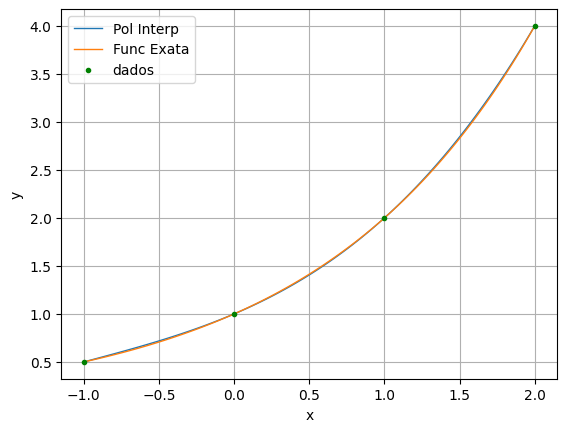

Erro:


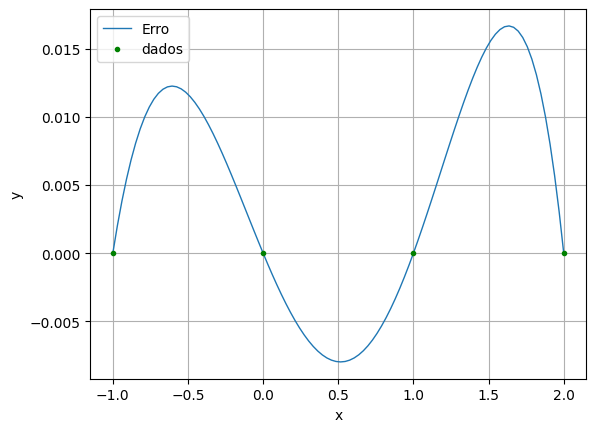

Erro máximo =  0.016657008208724733


In [ ]:
N = 100
x = np.linspace(a, b, N)

#Função exata
y_exato = f(x)

#Avalio o polinomio em cada um desses pontos
poln=np.empty(N)
for j, xj in enumerate(x):
  poln[j] = pol(xj, xd, yd)


print("Função e polinômio interpolador:")
plt.plot(x, poln, label="Pol Interp", linewidth=1)
plt.plot(x, y_exato, label="Func Exata",linewidth=1)
plt.plot(xd, yd, 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro:")
plt.plot(x, poln-y_exato, label="Erro", linewidth=1)
plt.plot(xd, np.zeros(len(xd)), 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro máximo = ", np.max(np.abs(poln-y_exato)) )

A aproximação parece ser excelente! Isso usando apenas 4 pontos (polinômio de grau 3)!

### ❗Exercício 1 ❗



Considere a função
$$
    f(x) = \frac{1}{1 + x^2},\quad x \in [-5, 5].
$$

e os pontos uniformemente espaçados em $n$ intervalos, onde é último dígito não nulo do seu número USP ($n=$ magic_int). Ou seja,
$$
x_i = i*10/n-5, \quad, i=0,1,...,n
$$


1.  Construa o polinômio interpolador dessa função nesses pontos.
2.  Avalie esse polinômio em $N=100$ pontos e faça um gráfico da aproximação e do erro.
3.  Calcule o erro máximo e reporte ao professor!

1.

2.

3. O erro máximo foi de 0.6164015686420334

In [ ]:
# Códigos

# Nossa tabela
a = -5.0  #inicio
b = 5.0   #fim
n = magic_int   #grau (são n+1 pontos)

#Valores de x
xd = np.linspace(a, b, n+1)
print("x:", xd)

# A função que queremos interpolar
def f(x):
  return 1.0/(1+x**2)

#Valores da função nos pontos de interpolação
yd = f(xd)
print("y:", yd)



x: [-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.        ]
y: [0.03846154 0.08256881 0.26470588 1.         0.26470588 0.08256881
 0.03846154]


Função e polinômio interpolador:


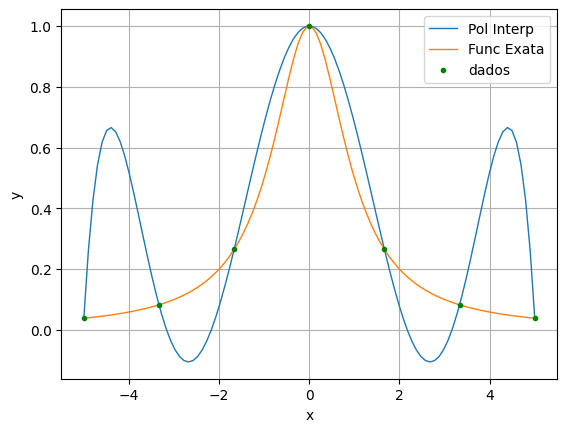

Erro:


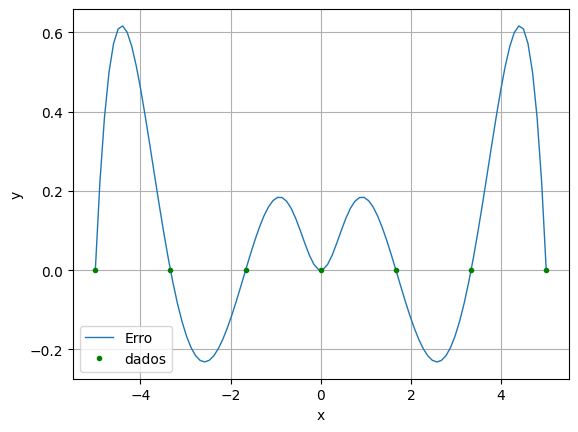

Erro máximo =  0.6164015686420334


In [ ]:
N = 100
x = np.linspace(a, b, N)

#Função exata
y_exato = f(x)

#Avalio o polinomio em cada um desses pontos
poln=np.empty(N)
for j, xj in enumerate(x):
  poln[j] = pol(xj, xd, yd)


print("Função e polinômio interpolador:")
plt.plot(x, poln, label="Pol Interp", linewidth=1)
plt.plot(x, y_exato, label="Func Exata",linewidth=1)
plt.plot(xd, yd, 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro:")
plt.plot(x, poln-y_exato, label="Erro", linewidth=1)
plt.plot(xd, np.zeros(len(xd)), 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro máximo = ", np.max(np.abs(poln-y_exato)) )



---



---



## Fórmula baricêntrica

Vejamos uma outra forma de implementar a interpolação de Langrange, que vai facilitar mais adiante o uso de vetorização e de pontos não equidistantes de Chebychev.

Vimos que o polinômio interpolador $p_n$ da tabela na forma de Lagrange é dado por

$$
    p_n(x) = \sum_{j=0}^n y_j L_j(x)
$$

onde os polinômios de Lagrange $L_j$ são definidos por

$$
    L_j(x) = \prod^n_{\substack{k = 0 \\ k \ne j}} \frac{x - x_k}{x_j - x_k}, \quad 0 \le j \le n.
$$

Manipulando-se as fórmulas acima podemos escrever a fórmula de Lagrange modificada

$$
    p_n(x) = L(x) \sum_{j=0}^n \frac{\omega_j}{x - x_j}y_j, \quad x \ne x_i,\ 0 \le i \le n,
$$

onde

$$
L(x) = (x - x_0)(x - x_1) \dots (x - x_n)
$$

e os **pesos baricêntricos** $\omega_j$ são definidos como

$$
    \omega_j = \Bigg[\prod^n_{\substack{k=0 \\ k \ne j}}(x_j - x_k)\Bigg]^{-1}, \quad 0 \le j \le n .
$$

Sabendo-se que se $y_i = 1$, $0 \le i \le n$, então $p_n(x) = 1$, $\forall x \in \mathbb{R}$, obtemos

$$
    1 = L(x)\sum_{j=0}^n \frac{\omega_j}{x - x_j}, \quad \forall x \ne x_i,\ 0 \le i \le n,
$$

então podemos dividir a expressão do nosso $p_n$ por este "1" e cancelar o termo $L(x)$ para obter a **fórmula baricêntrica:**

$$
    p_n(x) = \frac{\sum_{j=0}^n\frac{\omega_j}{x - x_j}y_j}{\sum_{m=0}^n\frac{\omega_m}{x - x_m}},
    \quad x \ne x_i,\ 0 \le i \le n.
$$

Se $x=x_j$, devemos simplesmente devolver que $p(x_j)=y_j$.

Há casos específicos nos quais os pesos são conhecidos explicitamente. Entre eles:

> **1)** Pontos igualmente espaçados no intervalo $[a,b]$
\begin{align}
    x_i &= a + i\cdot\left(\frac{b-a}{n}\right), \quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot \binom{n}{j}, \quad 0 \le j \le n.
\end{align}

> **2)** Pontos de Chebyshev do segundo tipo no intervalo $[a, b]$:
\begin{align}
    x_i &= -\frac{b-a}{2} \cdot \cos\left(\frac{i\pi}{n}\right),\quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot d_j,\ 0 \le j \le n, \text{ com } d_0 = d_n = 0.5,\ d_j = 1,\ 1 \le j \le n-1.
\end{align}

Note que nos dois casos os pesos independem do intervalo $[a,b]$. A diferença em cada intervalo seria um fator de escala comum a todos os pesos, o que não muda o resultado da fórmula baricêntrica.



Vejamos isso na prática, agora com uma implementação vetorial mais eficiente usando a fórmula baricêntrica:

In [ ]:
# Cálculo dos pesos da fórmula baricêntrica (w_j)

#Caso geral (para conjuntos arbitrários de pontos)
def w_bary(xd):
    # Cálculo dos pesos para a interpolação Lagrangeana baricêntrica.
    # Há duas rotinas separadas para os casos de pontos igualmente
    # espaçados e pontos de Chebyshev de segunda espécies. Ambos dependem
    # apenas da quantidade de pontos.

    np1 = np.size(xd) # n + 1

    # espaçamento arbitrário; use a fórmula
    v = np.empty(np1)
    for j in range(np1):
        aux = xd[j] - xd
        mask = (aux != 0.)
        v[j] = np.prod(aux[mask])
    return 1.0/v

#Caso de pontos equidistantes (só depende do número de pontos)
def w_equi(npoints): # npoints pontos equidistantes (npoints = n+1)
    vrange = np.arange(npoints) # [0, 1, ..., n]
    return np.power(-1, vrange) * binom(npoints-1, vrange) # (-1)^j * binom(n,j), j de 0 a n

#Caso dos pontos de Chebyshev de segunda espécies (só depende do número de pontos).
def w_cheby2(npoints): # np pontos de Chebyshev do segundo tipo
    vrange = np.arange(npoints) # [0, 1, ..., n]
    d = np.ones(npoints - 2); d = np.insert(d, 0, 0.5); d = np.append(d, 0.5) # [0.5,1,...,1,0.5]
    return np.power(-1, vrange) * d # [0.5,-1,...,(-1)^(n-1),(-1)^n * 0.5]

In [ ]:
def pol_bary(x, xd, yd, w):
    # Cálculo do valor no ponto x do polinômio interpolador
    # da tabela (xd, yd) usando a fórmula baricêntrica,
    # onde os pesos w relativos aos pontos xd foram
    # previamente calculados.
    #
    # A rotina vai devolver y=pol_bary(x) com as avaliações do polinômio nos pontos x

    np1 = np.size(xd) # n + 1
    N = np.size(x) # pontos de amostragem (funciona para escalares e vetores)
    if N == 1:     #Caso a entrada seja um escalar, e não um vetor
      x = np.array([x])
    numer = np.zeros(N) #numerador
    denom = np.zeros(N) #denominador
    y = np.zeros(N) #denominador
    val = np.zeros(N) #denominador

    #A formula baricentrica só vale para pontos x diferentes dos xd tabelados
    #  nos pontos tabelados devolvemos o valor de yd
    for j in range(np1):
      #Se o ponto de amostragem coincidir com um ponto tabelado
      xtab = (x - xd[j] == 0 )
      #Guardo já a resposta tabelada de yj
      y[xtab] = yd[j]
      #Precisamos tirar esse ponto da nossa lista de amostras, para evitar divisões por zero
      val[xtab] = np.nan

    #Indices válidos (que não são nan)
    i_val = ~np.isnan(val)

    xdiff = np.zeros_like(y)
    numer = np.zeros_like(y)
    denom = np.zeros_like(y)
    tmp = np.zeros_like(y)

    for j in range(np1):
        xdiff[i_val] = x[i_val] - xd[j]    #Diferença dos pontos x amostrados e dos tabelados
        tmp[i_val] = w[j] / xdiff[i_val]   # não teremos divisão por zero, pois trabalhamos apenas com x diferente de xd
        numer[i_val] += tmp[i_val] * yd[j] # numerador
        denom[i_val] += tmp[i_val]         # denominador

    y[i_val] = numer[i_val] / denom[i_val]

    if (N > 1):
        return y # retorna um array
    else:
        return y[0] # retorna um escalar

### Exemplo
Considere a tabela

$$
    \begin{array}{c|rccc}
        x & -1 & 0 & 1 & 2 \\
        \hline
        2^x & 0.5 & 1 & 2 & 4
    \end{array}
$$

da função $2^x$ nos pontos $-1, 0, 1$ e $2$. Primeiramente, calculemos os pesos baricêntricos. Podemos usar a expressão para pontos igualmente espaçados:


In [ ]:
# Nossa tabela

a = -1  #inicio
b = 2   #fim
n = 3   #grau (são n+1 pontos)

#Valores de x
xd = np.linspace(a, b, n+1)
print("x:", xd)

# A função que queremos interpolar
def f(x):
  return np.power(2.0, x)

#Valores de 2^x nos pontos de interpolação
yd = f(xd)
print("y:", yd)

w = w_equi(np.size(xd))
print("w:", w)

x: [-1.  0.  1.  2.]
y: [0.5 1.  2.  4. ]
w: [ 1. -3.  3. -1.]


Que valores obteríamos se usássemos a fórmula para espaçamento arbitrário?


In [ ]:
w_arb = w_bary(xd)
print(w_arb)

[-0.16666667  0.5        -0.5         0.16666667]


Note que o resultado é $1/6$ vezes o resultado obtido usando a expressão para pontos igualmente espaçados. Mas será que isso importa?




Calculemos uma aproximação para $\sqrt{2}$ usando a fórmula baricêntrica, com as duas expressões para os pesos:


In [ ]:
raiz2_equi = pol_bary(0.5, xd, yd, w)
raiz2_arb = pol_bary(0.5, xd, yd, w_arb)
print("raiz2_equi= ", raiz2_equi)
print("raiz2_arb= ", raiz2_arb)

raiz2_equi=  1.4062500000000002
raiz2_arb=  1.40625


O resultado é o mesmo (módulo arredondamento).

Vejamos o gráfico do polinômio interpolador, juntamente com os dados (usando os pesos da expressão para pontos igualmente espaçados) e o gráfico da função:


Função e polinômio interpolador:


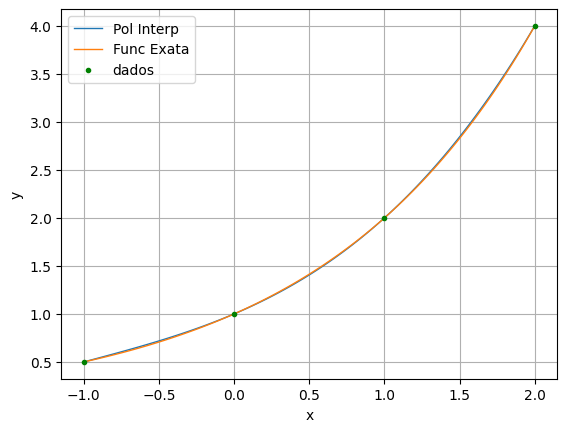

Erro:


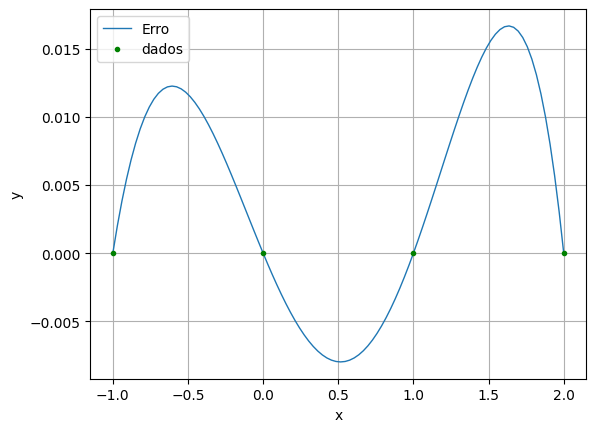

Erro máximo =  0.016657008208725177


In [ ]:
N = 100
x = np.linspace(a, b, N)

#Função exata
y_exato = f(x)

w = w_equi(np.size(xd))
#w = w_bary(xd)

#Avalio o polinomio em cada um desses pontos
# usando a fórmula baricêntrica de forma vetorial
poln=pol_bary(x, xd, yd, w)

print("Função e polinômio interpolador:")
plt.plot(x, poln, label="Pol Interp", linewidth=1)
plt.plot(x, y_exato, label="Func Exata",linewidth=1)
plt.plot(xd, yd, 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro:")
plt.plot(x, poln-y_exato, label="Erro", linewidth=1)
plt.plot(xd, np.zeros(len(xd)), 'g.', label="dados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

print("Erro máximo = ", np.max(np.abs(poln-y_exato)) )

A aproximação parece razoável em todo o intervalo (nem sempre é assim). Vejamos como o erro se comporta quando mudamos o grau do polinômio.


In [ ]:
a = -1  #inicio
b = 2   #fim
nmax = 20
def f(x):
  return np.power(2.0, x)

#Pontos de testagem
N = 100
x = np.linspace(a, b, N)
#Função exata
y_exato = f(x)

#Varrer diferentes graus
for n in range(nmax):
  xd = np.linspace(a, b, n+1) #x tabelado
  yd = f(xd)                  #y tabelado
  w = w_equi(np.size(xd))     #pesos baricêntricos
  poln = pol_bary(x, xd, yd, w) #Avalio o polinomio nos pontos
  erro = np.max(np.abs(poln-y_exato))
  print(n, erro)

0 3.5
1 0.8598577047386966
2 0.1260716301521323
3 0.016657008208725177
4 0.0019452788255338582
5 0.00020126941963649614
6 1.863198406359956e-05
7 1.5454267674464006e-06
8 1.1663385057758546e-07
9 8.05733524344987e-09
10 5.113145462587454e-10
11 2.9474200857748656e-11
12 1.6289192217300297e-12
13 9.237055564881302e-14
14 2.531308496145357e-14
15 4.218847493575595e-14
16 8.304468224196171e-14
17 1.092459456231154e-13
18 4.2454928461665986e-13
19 4.5075054799781356e-13




---



O polinômio interpolador não depende da ordem dos pontos $(x_i, y_i)$, $0 \le i \le n$. Calculemos então os pesos para a tabela dada na forma

$$
    \begin{array}{c|rccc}
        x & 1 & -1 & 2 & 0 \\
        \hline
        2^x & 2 & 0.5 & 4 & 1
    \end{array}
$$

e comparemos o valor obtido para o polinômio nos pontos usados para gerar o gráfico com os valores anteriores.


In [ ]:
xdd = np.array([1., -1., 2., 0.])
ydd = np.power(2., xdd)
print("x= ", xdd)
print("y= ", ydd)

x=  [ 1. -1.  2.  0.]
y=  [2.  0.5 4.  1. ]


In [ ]:
ww = w_bary(xdd) # Temos que usar espaçamento arbitrário !!!
print("pesos= ", ww)

pesos=  [-0.5        -0.16666667  0.16666667  0.5       ]


In [ ]:
yy = pol_bary(x, xdd, ydd, ww)



Os resultados, dentro da precisão, são os mesmos?


In [ ]:
erro_rel = np.max(np.abs((yy-poln)/poln))
print("erro relativo máximo: {:.1e}".format(erro_rel))

erro relativo máximo: 1.9e-02




---



---



## Exemplo de Runge

O exemplo de Runge é um exemplo clássico para ilustrar a não convergência do polinômio interpolador para a função quando aumentamos a quantidade de *pontos igualmente espaçados*. A função e o intervalo escolhido são:

$$
    f(x) = \frac{1}{1 + x^2},\quad x \in [-5, 5].
$$

Iremos observar o comportamento do polinômio interpolador para alguns conjuntos de pontos igualmente espaçados no intervalo $[-5,5]$.


In [ ]:
a = -5  #inicio
b = 5   #fim
def f(x):
  return 1.0/(1.0 + x*x) # Função


In [ ]:
#Função que interpola a função f(x) usando n+1 pontos uniformemente espaçados
#   por um polinômio de grau n e avalia em N pontos fazendo gráfico da função original e do polinômio
def interpol_equi_plot(n, N, a, b):
  np1 = n+1 # n + 1
  xd = np.linspace(a, b, np1)
  yd = f(xd)
  w = w_equi(np1)
  x = np.linspace(a, b, N) # Pontos para gerar gráficos
  fx = f(x) # Valor da função nesses pontos
  y = pol_bary(x, xd, yd, w)

  plt.plot(x, fx, label="f(x)")
  plt.plot(x, y, label="Pol Grau n ="+str(n))
  plt.plot(xd, yd,  'go', label="tabela")
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");



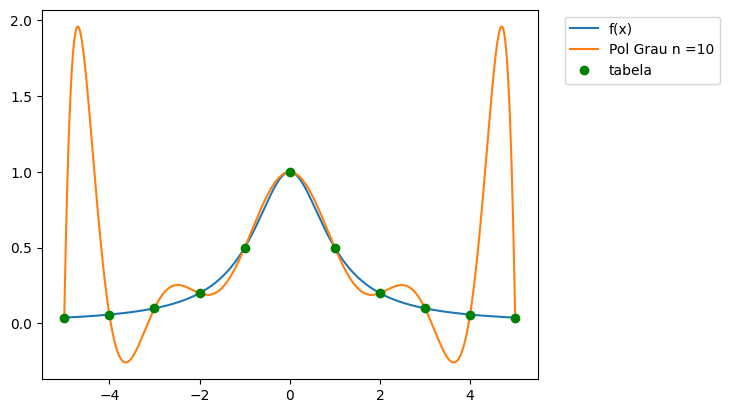

In [ ]:
grau_pol = 10
interpol_equi_plot(grau_pol, 1000, -5, 5)


Vamos variar o grau e ver o que acontece com o erro.

In [ ]:
nmax = 30
erros = np.zeros(nmax)
N = 1000
print("Grau   Erro")
for n in range(nmax):
  np1 = n+1 # n + 1
  xd = np.linspace(a, b, np1)
  yd = f(xd)
  w = w_equi(np1)
  x = np.linspace(a, b, N) # Pontos para gerar gráficos
  fx = f(x) # Valor da função nesses pontos
  y = pol_bary(x, xd, yd, w)
  erros[n] = np.max(np.abs(y-fx))
  print(n, erros[n])


Grau   Erro
0 0.9615134120908518
1 0.9615134120908518
2 0.6462285423402674
3 0.706988780247725
4 0.4383497951290457
5 0.4326689924794598
6 0.6169259580931749
7 0.24733818290101173
8 1.0451705181610058
9 0.30028454351755685
10 1.9156331475012054
11 0.5567287570014615
12 3.6629347001409336
13 1.0700529204260054
14 7.192324287742171
15 2.1068604877731048
16 14.386760399174735
17 4.223357792773924
18 29.18620706370518
19 8.575360826438413
20 59.76839905920153
21 17.602048487638758
22 123.61807766070129
23 36.39562319223503
24 257.21247481013586
25 75.7638656896028
26 538.171639711739
27 158.69210212199636
28 1130.7416065008747
29 333.9416665061654


Pode-se demonstrar rigorosamente que os polinômios interpoladores aproximam a função em um intervalo em torno da origem e divergem fora dele. As figuras acima dão uma ideia do que ocorre.


## Pontos de Chebyshev de segunda espécie

Quando podemos escolher os pontos para interpolação, os resultados podem ser bem melhores. Uma classe boa é dada pelos pontos de Chebyshev de segunda espécie, que são os pontos extremos do polinômio de Chebyshev de grau $n$, contidos no intevalo $[-1,1]$. Eles são calculados pela expressão

$$
    x_i = -\cos\left(\frac{i\pi}{n}\right), \quad 0 \le i \le n.
$$

Para termos uma ideia de como eles se distribuem no intervalo $[-1, 1]$, vejamos o caso $n=32$:


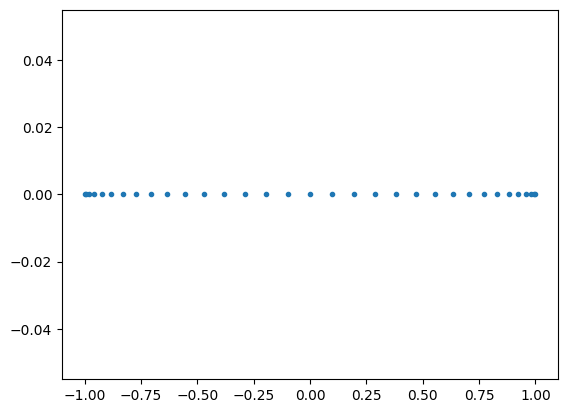

In [ ]:
N = 32
x_cheby = -np.cos(np.arange(N+1)*np.pi/N)
plt.plot(x_cheby, np.zeros(N+1), '.')
plt.show()

Note que os pontos são mais rarefeitos no meio e se acumulam nos extremos do intervalo. Esta propriedade ajuda em aproximações. Em um intervalo $[a, b]$ arbitrário, transportamos esses pontos usando a transformação linear afim que leva $[-1,1]$ em $[a, b]$:

$$
    x_i = -0.5\cdot(b-a)\cdot\cos\left(\frac{i\pi}{n}\right) + 0.5\cdot(a+b), \quad 0 \le i \le n.
$$

Como ficam as aproximações para a função do exemplo de Runge usando estes pontos no intervalo $[-5,5]$?


### ❗Exercício 2 ❗
Considere a função
$$
    f(x) = \frac{1}{1 + x^2},\quad x \in [-5, 5].
$$

e os pontos de $n+1$ Chebychev, onde $n$ é último dígito não nulo do seu número USP mais 1 ($n=$ magic_int+1). Assim,
$$
x_i = ??
$$


1.  Construa o polinômio interpolador dessa função nesses pontos de Chebychev.
2.  Avalie esse polinômio em $N=100$ pontos e faça um gráfico da aproximação e do erro.
3.  Calcule o erro máximo e reporte ao professor!




1.

2.

3. O erro máximo foi de 0.01773441664893821

In [ ]:
#Função que interpola a função f(x) usando n+1 pontos espaçados nos pontos de Chebychev
#   por um polinômio de grau n e avalia em N pontos fazendo gráfico da função original e do polinômio
def interpol_cheby_plot(n, N, a, b):
  np1 = n+1 # n + 1

  aux = np.arange(0,np1)
  xd = 0.5*(b-a)*np.cos(aux*np.pi/n) + 0.5*(a+b)

  yd = f(xd)
  w = w_cheby2(np1)
  x = np.linspace(a, b, N) # Pontos para gerar gráficos
  fx = f(x) # Valor da função nesses pontos
  y = pol_bary(x, xd, yd, w)

  erro_max = np.max(np.abs(y-fx))
  print(erro_max)

  plt.plot(x, fx, label="f(x)")
  plt.plot(x, y, label="Pol Grau n ="+str(n))
  plt.plot(xd, yd,  'go', label="tabela")
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

0.01773441664893821


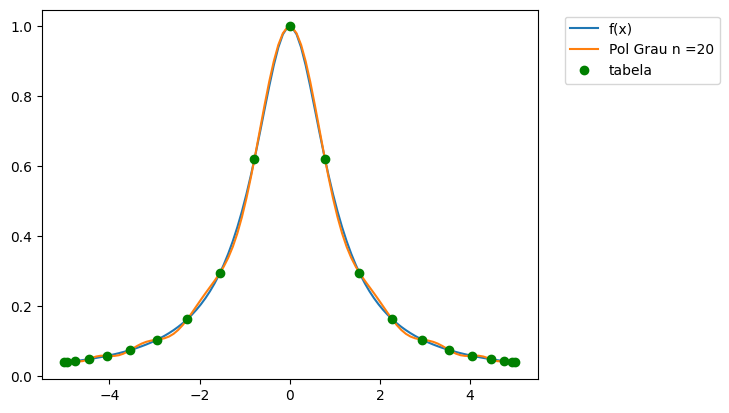

In [ ]:
grau_pol = 20
interpol_cheby_plot(grau_pol, 100, -5, 5)



Vejamos como se comporta o erro ao aumentarmos o grau do polinômio.


### ❗Exercício 3 ❗

Monte uma tabela que avalia o erro máximo da interpolação por polinômios usando pontos de Chebychev para a função de Runge variando o grau do polinômio. Responda:

1.  O Erro sempre cai quando aumentamos o grau do polinômio?
2.  Qual a razão de decaimento do erro (aproximadamente) quando aumentamos 2 graus do polinômio?

1. Não, quando aumentamos o grau do polinônomio de um grau par para um grau ímpar, o erro máximo também aumenta
2.


In [ ]:
nmax = 30
erros = np.zeros(nmax)
N = 1000
print("Grau   Erro")
for n in range(2, nmax):
  np1 = n+1 # n + 1

  aux = np.arange(0,np1)
  xd = 0.5*(b-a)*np.cos(aux*np.pi/n) + 0.5*(a+b)

  yd = f(xd)
  w = w_cheby2(np1)
  x = np.linspace(a, b, N) # Pontos para gerar gráficos
  fx = f(x) # Valor da função nesses pontos
  y = pol_bary(x, xd, yd, w)
  erros[n] = np.max(np.abs(y-fx))
  print(n, erros[n])


Grau   Erro
2 0.6462285423402674
3 0.8288875502875367
4 0.45998094035109316
5 0.6386170635191086
6 0.3111932854709804
7 0.4595822991030172
8 0.20467466589680217
9 0.31907415288242946
10 0.13219485295112798
11 0.2176868576555573
12 0.08438992158746184
13 0.1473070220903261
14 0.053507118800907416
15 0.09930812463776051
16 0.03671219726122932
17 0.06683494400595902
18 0.025716924977992384
19 0.044945368960839116
20 0.017737728449336965
21 0.03021431201688507
22 0.01208968956450962
23 0.020308137178146612
24 0.008165618501583483
25 0.013648807606864044
26 0.005475980746768139
27 0.009172835044295446
28 0.0036519205327821824
29 0.0061645926568209
